# 20 kmeans

## 지도학습 vs 비지도학습
* 지도학습 : 데이터와 레이블을 이용해서 규칙/패턴 파악
* 비지도학습 : 데이터만을 이용해서 유사도에 따른 규칙/패턴 파악

## kmeans
* 대표적 군집 알고리즘
* 서로 유사성이 높은 것끼리 관측값을 묶어 다수의 그룹을 만드는 알고리즘
* 즉, 동일 그룹내 구성원끼리는 유사성이 높고  
  다른 그룹내 구성원과의 유사성은 거의 없다는 의미
* 군집기반 분석기법, SSW, SSB

## 유사도 파악
* kmeans에서는 각 점간의 거리가 가까울수록  
  비슷한 특성을 가진다고 보고 데이터들을 모음(군집함)
* 따라서, 유사도 측정을 위해 임의의 기준점centeriod을 선정

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 정의
x = 7,2,6,3,6,5,3,1,5,7,7,2
y = 8,4,4,2,5,7,3,4,4,7,6,1

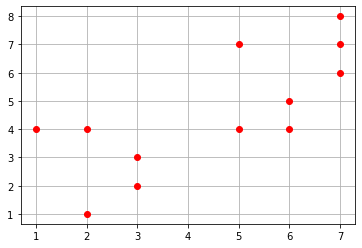

In [3]:
# 시각화
plt.plot(x, y, 'ro')
plt.grid()

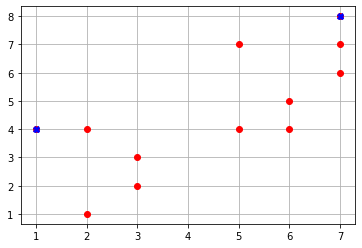

In [4]:
# 임의의 센터로이드 설정
# -> C1(1,4) C2(7,8)
plt.plot(x, y, 'ro')
plt.plot([1,7], [4,8], 'bX')
plt.grid()

In [5]:
# 센터로이드와 각 점들간 거리 계산 : 유클리드 거리 계산
# 즉, A(X1, Y1)와 B(X2, Y2)간의 거리계산은
# sqrt((X2-X1)^2 + (Y2-Y1)^2)로 함

In [6]:
# C(2,4)와 D(6,4)는 A(1,4),B(7,8) 중 어디와 가까운가?
math.sqrt((1-2)**2 + (4-4)**2)   # A ~ C : 1

1.0

In [7]:
math.sqrt((1-6)**2 + (4-4)**2)   # A ~ D : 5
# => C1로 분류

5.0

In [8]:
math.sqrt((7-2)**2 + (8-4)**2)   # B ~ C : 6.4

6.4031242374328485

In [9]:
math.sqrt((7-6)**2 + (8-4)**2)   # B ~ D : 4.1
# => C2로 분류

4.123105625617661

## 새로운 중심점 설정
* 모든 데이터에 대한 군집화가 수행된 후  
  새로운 중심점을 선정한 후 다시 유사도에 의한 군집 실시
* 새로운 중심점을 선정하는 방법은 각 군집별 평균값을 이용
* 즉, 군집 C1, C2의 각 x/y 좌표간 평균계산
    + C1의 새로운 좌표
        - x좌표 : 1,2,2,3,3 / 5 = 2.2
        - y좌표 : 1,2,3,4,4 / 5 = 2.8
        - (1,4) -> (2.2, 2.8)
    + C2의 새로운 좌표
        - x좌표 : 5,5,6,6,7,7,7 / 7 = 6.14
        - y좌표 : 4,4,5,6,7,7,8 / 7 = 5.85
        - (7,8) -> (6.14, 5.85)

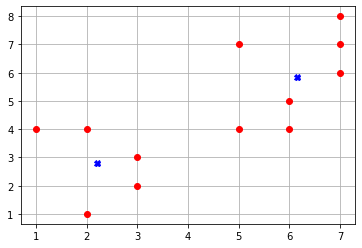

In [10]:
# 새로운 좌표 시각화
plt.plot(x, y, 'ro')
plt.plot([2.2, 6.14], [2.8, 5.85], 'bX')
plt.grid()

In [38]:
## iris 데이터셋을 kmeans로 군집화하기
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
# 데이터 적재 및 분할
iris = load_iris()

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target,
                                                stratify=iris.target,
                                                test_size=0.3, 
                                                random_state=2111151155)

In [41]:
# 군집분석 실시
# n_clusters : 군집수
# max_iter : 군집화 시도횟수
kms = KMeans(n_clusters=3, max_iter=100)

kms.fit(Xtrain)

KMeans(max_iter=100, n_clusters=3)

In [42]:
# 군집 결과 평가 : 객체명.labels_에 저장되어 있음
kms.labels_

array([1, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1,
       1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0], dtype=int32)

In [43]:
accuracy_score(kms.labels_, ytrain)
# 0.42, 0.90, ...

0.08571428571428572

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


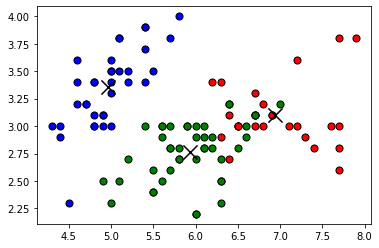

In [44]:
# 군집 시각화1
plt.scatter(Xtrain[kms.labels_==0, 0],
            Xtrain[kms.labels_==0, 1], s=50,
            marker='o', c='r', edgecolors='k')

plt.scatter(Xtrain[kms.labels_==1, 0],
            Xtrain[kms.labels_==1, 1], s=50,
            marker='o', c='b', edgecolors='k')

plt.scatter(Xtrain[kms.labels_==2, 0],
            Xtrain[kms.labels_==2, 1], s=50,
            marker='o', c='g', edgecolors='k')

# 군집 중심점은 객체명.cluster_centers_에 저장되어 있음
plt.scatter(kms.cluster_centers_[:,0],
            kms.cluster_centers_[:,1], 
            s=200, marker='x', c='k', edgecolors='r')

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


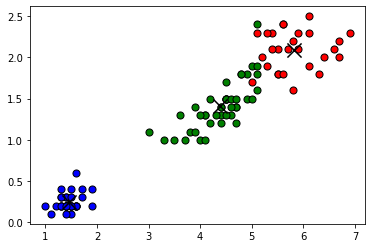

In [45]:
# 군집 시각화2
plt.scatter(Xtrain[kms.labels_==0, 2],
            Xtrain[kms.labels_==0, 3], s=50,
            marker='o', c='r', edgecolors='k')

plt.scatter(Xtrain[kms.labels_==1, 2],
            Xtrain[kms.labels_==1, 3], s=50,
            marker='o', c='b', edgecolors='k')

plt.scatter(Xtrain[kms.labels_==2, 2],
            Xtrain[kms.labels_==2, 3], s=50,
            marker='o', c='g', edgecolors='k')

# 군집 중심점은 객체명.cluster_centers_에 저장되어 있음
plt.scatter(kms.cluster_centers_[:,2],
            kms.cluster_centers_[:,3], 
            s=200, marker='x', c='k', edgecolors='r')

In [48]:
# 군집분석
kms.fit(Xtest)

accuracy_score(kms.labels_, ytest)
# 0, 0.44, 0.33, ...

0.4444444444444444

In [50]:
# 군집 성능 평가
# 실루엣계수 : 군집 적합도를 수치로 나타낸 것
# 1에 가까울수록 군집이 잘된 것으로 파악
silhouette_score(Xtrain, kms.labels_, metric='euclidean')   # 0.568

ValueError: Found input variables with inconsistent numbers of samples: [105, 45]

In [ ]:
# 반복문을 통해 적절한 군집갯수와 그에 따른 실루엣 계수 확인
sss = []
for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(Xtrain)
    ss = silhouette_score(Xtrain, kms.labels_, metric='euclidean')
    sss.append(ss)
    
plt.plot(sss, 'ro-')

In [ ]:
sss = []
for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(Xtest)
    ss = silhouette_score(Xtest, kms.labels_, metric='euclidean')
    sss.append(ss)
    
plt.plot(sss, 'ro-')

In [ ]:
# 엘보우 게수 : 군집화가 된 후 각 중심점에서 군집 데이터간의 거리를 합산한 값
#              군집이 어느정도로 잘되어 있는지를 나타내는 값
#              이 값이 작을수록 군집의 응집이 높다는 의미
#              객체명.inertia_

In [ ]:
sss = []
els = []
for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(Xtest)
    ss = silhouette_score(Xtest, kms.labels_, metric='euclidean')
    sss.append(ss)
    els.append(kms.inertia_)
    
plt.plot(sss, 'ro-')
# 실루엣 계수만으로는 적절한 군집의 수를 파악하기 어려움

In [ ]:
plt.plot(els, 'ro-')
# 엘보우 계수로 적절한 군집의 수를 파악하기에 다소 쉬운편
# 즉, 엘보우 계수값이 급변하는 구간의 k값이 적절한 군집수로 인식함

In [23]:
# 학생성적과 집중도를 기준으로 클래스를 나누려고 할 때
# 몇 개의 반으로 나누는 것이 좋을지 알아보세요
ac = pd.read_csv('academy.csv', encoding='euc-kr')
ac.head()

,학생번호,국어점수평균,수학점수평균,영어점수평균,과학점수평균,학업집중도
0,1,90,75,85,60,70
1,2,65,90,60,88,80
2,3,45,53,48,50,60
3,4,77,96,62,92,70
4,5,88,89,80,82,90


In [24]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   학생번호    52 non-null     int64
 1   국어점수평균  52 non-null     int64
 2   수학점수평균  52 non-null     int64
 3   영어점수평균  52 non-null     int64
 4   과학점수평균  52 non-null     int64
 5   학업집중도   52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [25]:
data=ac.iloc[:,1:]

In [26]:
sss = []
els = []
for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(data)
    ss = silhouette_score(data, kms.labels_, metric='euclidean')
    sss.append(ss)
    els.append(kms.inertia_)

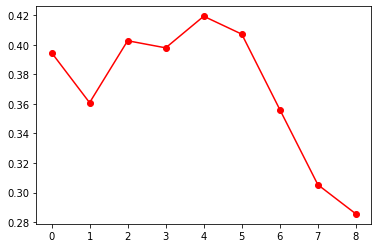

In [27]:
plt.plot(sss, 'ro-')

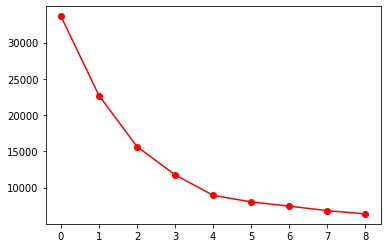

In [28]:
plt.plot(els, 'ro-')

In [29]:
# 엘보우 계수를 확인해보니
# 적절한 군집의 갯수는 3~4로 보임

## 군집의 갯수가 3일때

In [30]:
# 군집의 갯수가 3일때
kms = KMeans(n_clusters=3, max_iter=100, random_state=2111151440)
kms.fit(data)

KMeans(max_iter=100, n_clusters=3, random_state=2111151440)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  from ipykernel import kernelapp as app


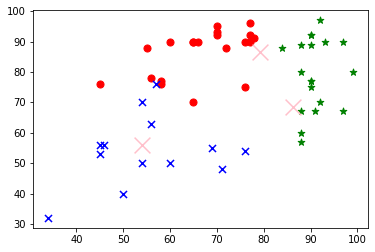

In [31]:
plt.scatter(data.iloc[kms.labels_==0,0],
            data.iloc[kms.labels_==0,1], 
            s=50, c='red', marker='o')

plt.scatter(data.iloc[kms.labels_==1,0],
            data.iloc[kms.labels_==1,1], 
            s=50, c='blue', marker='x')

plt.scatter(data.iloc[kms.labels_==2,0],
            data.iloc[kms.labels_==2,1], 
            s=50, c='green', marker='*')

plt.scatter(kms.cluster_centers_[:,1],
            kms.cluster_centers_[:,2], 
            s=250, c='pink', marker='x', edgecolors='k')

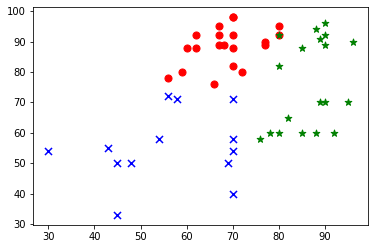

In [32]:
plt.scatter(data.iloc[kms.labels_==0,2],
            data.iloc[kms.labels_==0,3], 
            s=50, c='red', marker='o')

plt.scatter(data.iloc[kms.labels_==1,2],
            data.iloc[kms.labels_==1,3], 
            s=50, c='blue', marker='x')

plt.scatter(data.iloc[kms.labels_==2,2],
            data.iloc[kms.labels_==2,3], 
            s=50, c='green', marker='*')

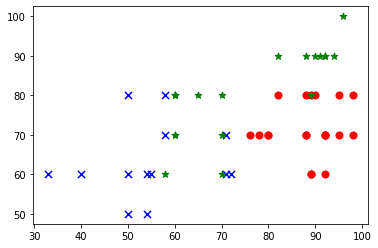

In [33]:
plt.scatter(data.iloc[kms.labels_==0,3],
            data.iloc[kms.labels_==0,4], 
            s=50, c='red', marker='o')

plt.scatter(data.iloc[kms.labels_==1,3],
            data.iloc[kms.labels_==1,4], 
            s=50, c='blue', marker='x')

plt.scatter(data.iloc[kms.labels_==2,3],
            data.iloc[kms.labels_==2,4], 
            s=50, c='green', marker='*')

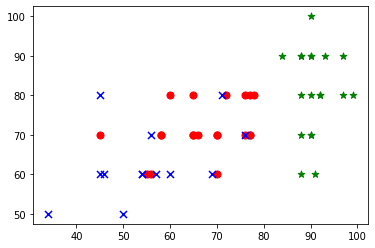

In [34]:
plt.scatter(data.iloc[kms.labels_==0,0],
            data.iloc[kms.labels_==0,4], 
            s=50, c='red', marker='o')

plt.scatter(data.iloc[kms.labels_==1,0],
            data.iloc[kms.labels_==1,4], 
            s=50, c='blue', marker='x')

plt.scatter(data.iloc[kms.labels_==2,0],
            data.iloc[kms.labels_==2,4], 
            s=50, c='green', marker='*')

In [35]:
# 0,1(국어,수학)을 기준으로 나눈 그래프만 유의해보임

## 군집의 갯수가 4일때

In [36]:
kms = KMeans(n_clusters=4, max_iter=100, random_state=2111151440)
kms.fit(data)

KMeans(max_iter=100, n_clusters=4, random_state=2111151440)

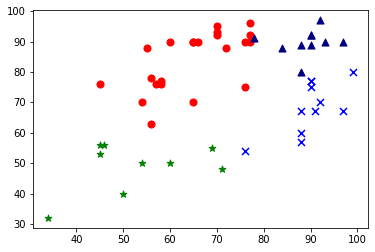

In [37]:
plt.scatter(data.iloc[kms.labels_==0,0],
            data.iloc[kms.labels_==0,1], 
            s=50, c='red', marker='o')

plt.scatter(data.iloc[kms.labels_==1,0],
            data.iloc[kms.labels_==1,1], 
            s=50, c='blue', marker='x')

plt.scatter(data.iloc[kms.labels_==2,0],
            data.iloc[kms.labels_==2,1], 
            s=50, c='green', marker='*')

plt.scatter(data.iloc[kms.labels_==3,0],
            data.iloc[kms.labels_==3,1], 
            s=50, c='navy', marker='^')